Steps in ML process:
1. Data collection
2. Data preprocessing
3. ML modeling
4. Model evaluation
5. Deployment

In [1]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #applying ML model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error #evaluating ML model


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Data collection performed or done
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Car_sales.csv") #Reading csv and creating dataframe is what i did

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [4]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [5]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [6]:
df['Manufacturer'].value_counts()

,count
Manufacturer,
Dodge,11
Ford,11
Toyota,9
Chevrolet,9
Mercedes-B,9
Mitsubishi,7
Nissan,7
Chrysler,7
Volvo,6


In [7]:
df['Model'].value_counts()

,count
Model,
Neon,2
Integra,1
Cutlass,1
Sentra,1
Altima,1
...,...
Windstar,1
Expedition,1
Ranger,1


In [8]:
df[df['Model'] == 'Neon']

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
35,Dodge,Neon,76.034,7.75,Passenger,12.64,2.0,132.0,105.0,74.4,174.4,2.567,12.5,29.0,12/12/2011,52.084899
114,Plymouth,Neon,32.734,7.75,Passenger,12.64,2.0,132.0,105.0,74.4,174.4,2.559,12.5,29.0,4/26/2011,52.084899


In [19]:
df['Vehicle_type'].value_counts()

,count
Vehicle_type,
Passenger,112
Car,40


In [9]:
print(df.isnull().sum())

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64


In [10]:
import matplotlib.pyplot as plt

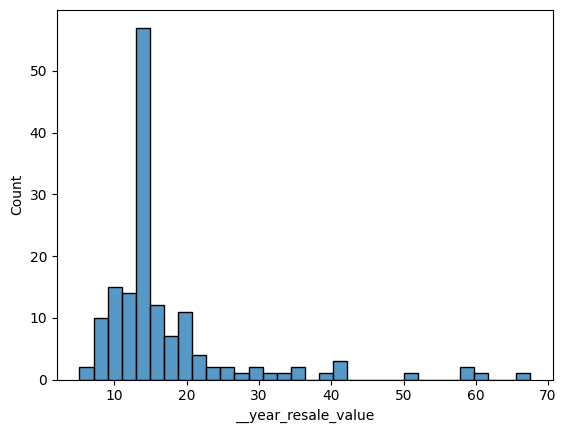

In [21]:
sns.histplot(x=df['__year_resale_value'])
plt.show()

In [12]:
df['__year_resale_value'].median()

14.18

Handling missing values

In [13]:
df['__year_resale_value'].fillna(df['__year_resale_value'].median(),inplace=True) #fillna is to impute values

<ipython-input-13-34f993edbd96>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['__year_resale_value'].fillna(df['__year_resale_value'].median(),inplace=True)


In [14]:
print(df.isnull().sum())

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     2
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Latest_Launch          0
Power_perf_factor      2
dtype: int64


In [15]:
df.dropna(inplace=True) #remove rows which have nulls

In [16]:
df.shape

(152, 16)

In [17]:
print(df.isnull().sum())

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64


Create some visualizations to understand the data or explore the data

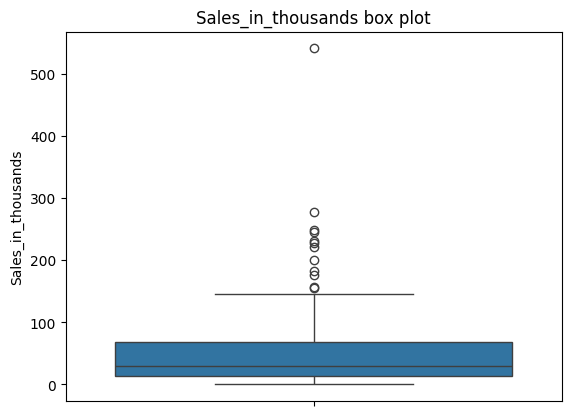

In [18]:
sns.boxplot(df['Sales_in_thousands'])
plt.title("Sales_in_thousands box plot")
plt.show()

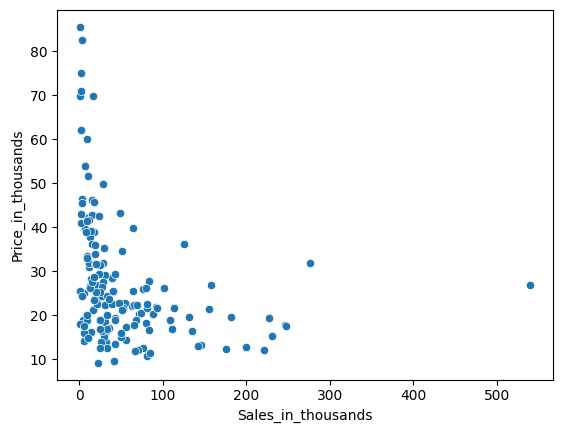

In [20]:
sns.scatterplot(x=df['Sales_in_thousands'], y=df['Price_in_thousands'])
plt.show()

Feature engineering and feature selection

In [30]:
# Feature engineering is deriving new features
# Launch data if you use it as it is - it is of now use.
# if you get year out of it or if you get age of car using it then it would be more useful

In [23]:
df['Latest_Launch'].head()

,Latest_Launch
0,2/2/2012
1,6/3/2011
3,3/10/2011
4,10/8/2011
5,8/9/2011


In [25]:
df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Manufacturer         152 non-null    object        
 1   Model                152 non-null    object        
 2   Sales_in_thousands   152 non-null    float64       
 3   __year_resale_value  152 non-null    float64       
 4   Vehicle_type         152 non-null    object        
 5   Price_in_thousands   152 non-null    float64       
 6   Engine_size          152 non-null    float64       
 7   Horsepower           152 non-null    float64       
 8   Wheelbase            152 non-null    float64       
 9   Width                152 non-null    float64       
 10  Length               152 non-null    float64       
 11  Curb_weight          152 non-null    float64       
 12  Fuel_capacity        152 non-null    float64       
 13  Fuel_efficiency      152 non-null    flo

In [27]:
df['Launch_year'] = df['Latest_Launch'].dt.year

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 156
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Manufacturer         152 non-null    object        
 1   Model                152 non-null    object        
 2   Sales_in_thousands   152 non-null    float64       
 3   __year_resale_value  152 non-null    float64       
 4   Vehicle_type         152 non-null    object        
 5   Price_in_thousands   152 non-null    float64       
 6   Engine_size          152 non-null    float64       
 7   Horsepower           152 non-null    float64       
 8   Wheelbase            152 non-null    float64       
 9   Width                152 non-null    float64       
 10  Length               152 non-null    float64       
 11  Curb_weight          152 non-null    float64       
 12  Fuel_capacity        152 non-null    float64       
 13  Fuel_efficiency      152 non-null    flo

In [29]:
df['Launch_year'].head()

,Launch_year
0,2012
1,2011
3,2011
4,2011
5,2011


In [32]:
## get age of the car
df['car_age'] = (pd.to_datetime('today') - df['Latest_Launch']).dt.days // 365

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 156
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Manufacturer         152 non-null    object        
 1   Model                152 non-null    object        
 2   Sales_in_thousands   152 non-null    float64       
 3   __year_resale_value  152 non-null    float64       
 4   Vehicle_type         152 non-null    object        
 5   Price_in_thousands   152 non-null    float64       
 6   Engine_size          152 non-null    float64       
 7   Horsepower           152 non-null    float64       
 8   Wheelbase            152 non-null    float64       
 9   Width                152 non-null    float64       
 10  Length               152 non-null    float64       
 11  Curb_weight          152 non-null    float64       
 12  Fuel_capacity        152 non-null    float64       
 13  Fuel_efficiency      152 non-null    flo

In [34]:
df['car_age'].head()

,car_age
0,12
1,13
3,13
4,13
5,13


In [35]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Launch_year,car_age
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,2012,12
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,2011,13
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,2011,13
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,2011,13
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2011-08-09,84.565105,2011,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,14.180,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,2011-09-21,66.498812,2011,13
153,Volvo,S70,15.245,14.180,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,2012-11-24,70.654495,2012,11
154,Volvo,V70,17.531,14.180,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,2011-06-25,71.155978,2011,13
155,Volvo,C70,3.493,14.180,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,2011-04-26,101.623357,2011,13


Preparing data for modeling

In [36]:
# Feature selection
df = df.drop(['Latest_Launch','Launch_year'], axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         152 non-null    object 
 1   Model                152 non-null    object 
 2   Sales_in_thousands   152 non-null    float64
 3   __year_resale_value  152 non-null    float64
 4   Vehicle_type         152 non-null    object 
 5   Price_in_thousands   152 non-null    float64
 6   Engine_size          152 non-null    float64
 7   Horsepower           152 non-null    float64
 8   Wheelbase            152 non-null    float64
 9   Width                152 non-null    float64
 10  Length               152 non-null    float64
 11  Curb_weight          152 non-null    float64
 12  Fuel_capacity        152 non-null    float64
 13  Fuel_efficiency      152 non-null    float64
 14  Power_perf_factor    152 non-null    float64
 15  car_age              152 non-null    int64  


In [38]:
# from sklearn --> preprocessing and in that folder - there are 2 methods - label encoder and 2nd is standard scaler
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
for column in ['Manufacturer', 'Model', 'Vehicle_type']:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoders[column] = le

In [39]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,car_age
0,0,78,16.919,16.360,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,12
1,0,139,39.384,19.875,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,13
3,0,112,8.588,29.725,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,13
4,1,8,20.397,22.255,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,13
5,1,9,18.780,23.555,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,13


In [40]:
# Feature selection
df = df.drop(['Model'], axis=1)

In [41]:
df.head()

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,car_age
0,0,16.919,16.360,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,12
1,0,39.384,19.875,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,13
3,0,8.588,29.725,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,13
4,1,20.397,22.255,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,13
5,1,18.780,23.555,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,13


In [ ]:
## Optional - but it is necessary when you have numerical columns having different ranges
scaler = StandardScaler()
numeric_cols = ['Age','Distance from Home', 'Monthly Income', 'Total experience']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [42]:
## split my dataframe to training and testing dataframe
from sklearn.model_selection import train_test_split

# Define the features and target variable (assuming 'Monthly Income' as target)
X = df.drop(['Sales_in_thousands'], axis=1) # replace with __year_resale_value
y = df['Sales_in_thousands'] #replace with __year_resale_value

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = LinearRegression()

In [44]:
model.fit(X_train, y_train) #training ML model

LinearRegression()

In [45]:
### testing - ML model
y_pred = model.predict(X_test) #y_pred is prediction from model for X_test

In [46]:
print("R-squared:", r2_score(y_test, y_pred)) # R-Squared should be += 0.70
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("\n")

R-squared: 0.3032863939242989
MAPE: 3.550654150859634
MSE: 1804.5841461556306




In [47]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

RMSE: 6.5176987655656955


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [48]:
model_RF = RandomForestRegressor()

In [49]:
model_RF.fit(X_train, y_train) #training ML model

RandomForestRegressor()

In [50]:
y_pred_rf = model_RF.predict(X_test)

In [51]:
print("R-squared:", r2_score(y_test, y_pred_rf)) # R-Squared should be += 0.70

R-squared: 0.15111305702751532
